# Analyzing volumes for word frequencies
This notebook will demonstrate some of basic functionality of the Hathi Trust FeatureReader object. We will look at a few examples of easily replicable text analysis techniques — namely word frequency and visualization.

In [47]:
from htrc_features import FeatureReader
import os
import numpy as np
import pandas as pd

get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Part 1 — Word frequency in novels
The following cells load a collection of nine novels from the 18th-20th centuries, chosen from an HTRC collection. Also loaded are a collection of math textbooks from the 17th-19th centuries, but the latter will be used in a later part. The collection of novels will be used as a departure point for our text analysis.

In [48]:
%%bash
htid2rsync --f novels-word-use.txt | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/

[sandbox] Welcome to the HathiTrust Research Center rsync server.

receiving file list ... done

sent 748 bytes  received 1,709 bytes  1,638.00 bytes/sec
total size is 1,768,677  speedup is 719.85


In [49]:
paths = [os.path.join('local-folder', 'hvd/pairtree_root/32/04/40/11/76/45/45/32044011764545/hvd.32044011764545.json.bz2'), 
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/02/96/98/74/39015002969874/mdp.39015002969874.json.bz2'), 
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/07/03/27/10/39015007032710/mdp.39015007032710.json.bz2'), 
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/42/15/25/23/39015042152523/mdp.39015042152523.json.bz2'), 
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/46/34/91/41/39015046349141/mdp.39015046349141.json.bz2'),
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/78/55/08/63/39015078550863/mdp.39015078550863.json.bz2'),
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/78/56/59/11/39015078565911/mdp.39015078565911.json.bz2'),
         os.path.join('local-folder', 'pst/pairtree_root/00/00/67/11/28/69/000067112869/pst.000067112869.json.bz2'), 
         os.path.join('local-folder', 'wu/pairtree_root/89/00/12/77/76/3/89001277763/wu.89001277763.json.bz2')]

fr_novels = FeatureReader(paths)

## Note: selecting volumes
The following cell is useful in choosing a volume to manipulate. Set TITLE_WORD to any word that is contained in the title of the fr-volume you would like to work with (the string comparison is case-insensitive since some titles are lower-case). The volume will then be stored as 'vol', and can be reassigned to any variable name you would like! As an example, TITLE_WORD is currently set to "grapes", meaning "The Grapes of Wrath" by John Steinbeck is the current volume saved under the variable name vol. You can change this cell at any time to work with a different volume.

In [50]:
TITLE_WORD = 'grapes'

for vol in fr_novels:
    print(vol.title)

for vol in fr_novels:
    if TITLE_WORD.lower() in vol.title.lower():
        print('Current volume:', vol.title)
        break

Wuthering heights.
Nine stories.
Uncle Tom's cabin,
The grapes of wrath / John Steinbeck ; with an introduction by Brad Leithauser.
The sound and the fury / [by] William Faulkner ; with an introduction by Richard Hughes.
The life and adventures of Robinson Crusoe.
Gulliver's travels. By Jonathan Swift ...
To kill a mockingbird / by Harper Lee ; editor, Don Noble.
Great expectations / by Charles Dickens.
Current volume: The grapes of wrath / John Steinbeck ; with an introduction by Brad Leithauser.


## Sampling tokens from a book
The following cell will display the most common tokens (words, punctuation marks) in a given volume, alongside the number of times they appear. It will also calculate their relative frequencies (found by dividing the number of appearances over the total number of words in the book) and display the results in a DataFrame.

In [51]:
tokens = vol.tokenlist(pos=False, case=False, pages=False).sort_values('count', ascending=False)

freqs = []
for count in tokens['count']:
    freqs.append(count/sum(tokens['count']))
    
tokens['frequency'] = freqs
tokens

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


count  frequency
section lowercase                   
body    .           17963   0.074535
        '           13333   0.055323
        ,           12061   0.050045
        the         11400   0.047303
        and          6084   0.025245
        a            4894   0.020307
        to           3624   0.015037
        i            3104   0.012880
        he           2916   0.012100
        of           2710   0.011245
        you          2677   0.011108
        in           2622   0.010880
        an'          2333   0.009680
        's           2222   0.009220
        said         2221   0.009216
        it           2198   0.009120
        n't          1911   0.007929
        they         1900   0.007884
        his          1751   0.007266
        on           1734   0.007195
        ?            1644   0.006822
        was          1631   0.006768
        we           1559   0.006469
        she          1525   0.006328
        that         1454   0.006033
        her          1408   0.005842
        got          1285   0.005332
        out          1164   0.004830
        up           1163   0.004826
        with         1090   0.004523
...                   ...        ...
        18              1   0.000004
        hitch           1   0.000004
        hitchcock       1   0.000004
        hitched         1   0.000004
        hones'          1   0.000004
        hominy          1   0.000004
        homicide        1   0.000004
        homeyness       1   0.000004
        homework        1   0.000004
        homeward        1   0.000004
        homes           1   0.000004
        home-made       1   0.000004
        179             1   0.000004
        hollywood       1   0.000004
        hollowness      1   0.000004
        hollowly        1   0.000004
        hoisting        1   0.000004
        hoist           1   0.000004
        hogs            1   0.000004
        hoes            1   0.000004
        hoed            1   0.000004
        hock            1   0.000004
        hobnailed       1   0.000004
        hobbled         1   0.000004
        hoarded         1   0.000004
        hittin'         1   0.000004
        hits            1   0.000004
        hitchhiker      1   0.000004
        hitchhike       1   0.000004
        •al             1   0.000004

[11373 rows x 2 columns]

### Graphing word frequencies
The following cell outputs a bar plot of the most common tokens from the volume and their frequencies.

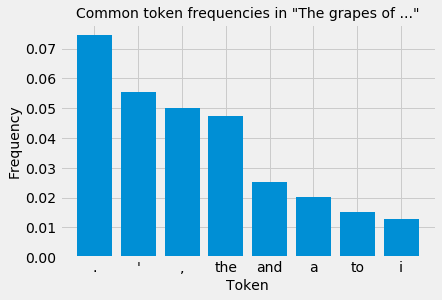

In [52]:
# Build a list of frequencies and a list of tokens.
freqs_1, tokens_1 = [], []
for i in range(8):
    freqs_1.append(freqs[i])
    tokens_1.append(tokens.index.get_level_values('lowercase')[i])

# Create a range for the x-axis
x_ticks = np.arange(len(tokens_1))

# Plot!
plt.bar(x_ticks, freqs_1)
plt.xticks(x_ticks, tokens_1)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Token', fontsize=14)
plt.title('Common token frequencies in "' + vol.title[:14] + '..."', fontsize=14)

As you can see, the most common tokens in "The Grapes of Wrath" are mostly punctuation and basic words that don't provide context. Let's see if we can narrow our search to gain some more relevant insight. But first, head back up to the Selecting Volumes cell and set vol to a different novel in our set. Then, re-run the previous two cells and see how the bar plot changes.

In [53]:
# This cell creates  a list of tokens to ignore. It comes from an online list of stop words.
stop_words = ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against",
              "all", "almost", "alone", "along", "already", "also","although","always","am","among",
              "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone",
              "anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became",
              "because","become","becomes", "becoming", "been", "before", "beforehand", "behind",
              "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom",
              "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry",
              "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight",
              "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever",
              "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify",
              "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found",
              "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt",
              "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon",
              "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if",
              "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last",
              "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile",
              "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must",
              "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine",
              "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off",
              "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise",
              "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please",
              "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious",
              "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so",
              "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still",
              "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves",
              "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon",
              "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through",
              "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve",
              "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we",
              "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter",
              "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while",
              "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within",
              "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "'",
              ",", ".", "-", "–", '"', "!", "?", "i", 'an']

Now that we have a list of words to ignore in our search, we can make a few tweaks to our plotting cell.

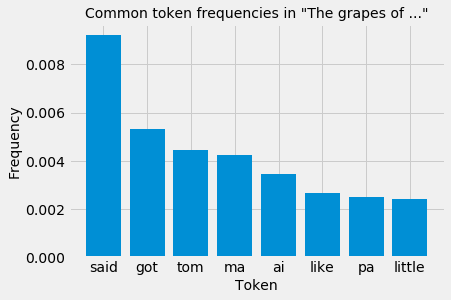

In [54]:
# These next few lines are just like above; they build our DataFrame of common tokens.
tokens = vol.tokenlist(pos=False, case=False, pages=False).sort_values('count', ascending=False)

freqs = []
for count in tokens['count']:
    freqs.append(count/sum(tokens['count']))
    
tokens['frequency'] = freqs

# This is where things get different. Before we add a token to tokens_2, we need to check that it's not a stop word.
freqs_2, tokens_2, i = [], [], 0
while len(tokens_2) < 8:
    if tokens.index.get_level_values('lowercase')[i] not in stop_words:
        # This line eliminates some tokens 
        if "'" not in tokens.index.get_level_values('lowercase')[i]:
            freqs_2.append(freqs[i])
            tokens_2.append(tokens.index.get_level_values('lowercase')[i])
    i += 1

# Create a range for the x-axis
x_ticks = np.arange(len(tokens_2))

# Plot!
plt.bar(x_ticks, freqs_2)
plt.xticks(x_ticks, tokens_2)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Token', fontsize=14)
plt.title('Common token frequencies in "' + vol.title[:14] + '..."', fontsize=14)

That's better. No more punctuation and lower frequencies on the y-axis mean that narrowing down our search choices was effective.

## Sampling tokens from all books
Now we can see how relative word frequencies compare across all the books in our sample. To do this, we'll need a few useful functions.
The first finds the most common noun in a volume, with adjustable parameters for minimum length.
The second calculates the relative frequency of a token across the entirety of a volume, saving us the time of doing the calculation like in the above cell.
Finally, we'll have a visualization function to create a bar plot of relative frequencies for all volumes in our sample, so that we can easily track how word frequencies differ across titles.

In [69]:
# A function to return the most common noun of length at least word_length in the volume.
# NOTE: word_length defaults to 2.
# e.g. most_common_noun(fr_novels.first) returns 'time'.

def most_common_noun(vol, word_length=2):   
    # Build a table of common nouns
    tokens_1 = vol.tokenlist(pages=False, case=False)
    nouns_only = tokens_1.loc[(slice(None), slice(None), ['NN']),]
    top_nouns = nouns_only.sort_values('count', ascending=False)

    token_index = top_nouns.index.get_level_values('lowercase')
    
    # Choose the first token at least as long as word_length with non-alphabetical characters
    for i in range(max(token_index.shape)):
        if (len(token_index[i]) >= word_length):
            if("'", "!", ",", "?" not in token_index[i]):
                return token_index[i]
    print('There is no noun of this length')
    return None

In [70]:
# Return the usage frequency of a given word in a given volume. 
# NOTE: frequency() returns a dictionary entry of the form {'word': frequency}.
# e.g. frequency(fr_novels.first(), 'blue') returns {'blue': 0.00012}

def frequency(vol, word):
    t1 = vol.tokenlist(pages=False, pos=False, case=False)
    token_index = t1[t1.index.get_level_values("lowercase") == word]
    
    if len(token_index['count'])==0:
        return {word: 0}
    
    count = token_index['count'][0]
    freq = count/sum(t1['count'])
    
    return {word: float('%.5f' % freq)}

In [71]:
# Returns a plot of the usage frequencies of the given word across all volumes in the given FeatureReader collection.
# NOTE: frequencies are given as percentages rather than true ratios.
def frequency_bar_plot(word, fr):
    freqs, titles = [], []
    for vol in fr:
        title = vol.title
        short_title = title[:6] + (title[6:] and '..')
        freqs.append(100*frequency(vol, word)[word])
        titles.append(short_title)
        
    # Format and plot the data
    x_ticks = np.arange(len(titles))
    plt.bar(x_ticks, freqs)
    plt.xticks(x_ticks, titles, fontsize=10)
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.title('Frequency of "' + word + '"', fontsize=14)

### Testing frequency functions
The following cells call our frequency functions on a few examples from the novels FeatureReader.

In [72]:
# Most common noun in fr_novels.first
vol = fr_novels.first()
most_common_noun(vol)

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


'time'

In [73]:
# Most common noun of length at least 10 in fr_novels.first
most_common_noun(vol, 10)

'countenance'

In [74]:
# Frequency of 'countenance' in fr_novels.first
frequency(vol, 'countenance')

{'countenance': 0.00017}

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


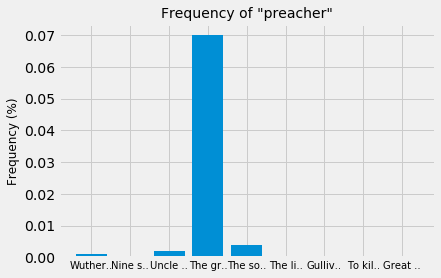

In [75]:
# Frequency bar plot for most common >=7-letter noun in The Grapes of Wrath
for vol in fr_novels:
    if 'grapes' in vol.title:
        break
        
frequency_bar_plot(most_common_noun(vol, 7), fr_novels)

Your turn! See if you can output a bar plot of the most common noun of length at least 5 in "To Kill a Mockingbird". REMEMBER, you may have to set vol to a different value than it already has.

In [76]:
# Use the provided frequency functions to plot the most common 5-letter noun in "To Kill a Mockinbird".
# Your solution should be just one line of code.





## Part 2— Non-fiction volumes
Now we'll load a collection of 33 math textbooks from the 18th and 19th centuries. These volumes focus on number theory and arithmetic, and were written during the lives of Leonhard Euler and Joseph-Louis Lagrange – two of the most prolific researchers of number theory in all of history. As a result, we can expect the frequency of certain words and topics to shift over time to reflect the state of contemporary research. Let's load them and see.

In [63]:
%%bash
htid2rsync --f math-collection.txt | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/

[sandbox] Welcome to the HathiTrust Research Center rsync server.

receiving file list ... done

sent 2,620 bytes  received 5,060 bytes  3,072.00 bytes/sec
total size is 6,390,002  speedup is 832.03


In [64]:
math_paths = [
    'hvd/pairtree_root/32/04/40/14/61/26/26/32044014612626/hvd.32044014612626.json.bz2',
    'hvd/pairtree_root/hn/5f/26/hn5f26/hvd.hn5f26.json.bz2',
    'hvd/pairtree_root/hn/5z/9x/hn5z9x/hvd.hn5z9x.json.bz2',
    'mdp/pairtree_root/39/01/50/07/02/69/93/39015007026993/mdp.39015007026993.json.bz2',
    'mdp/pairtree_root/39/01/50/10/96/31/58/39015010963158/mdp.39015010963158.json.bz2',
    'mdp/pairtree_root/39/01/50/18/03/70/05/39015018037005/mdp.39015018037005.json.bz2',
    'mdp/pairtree_root/39/01/50/36/84/95/63/39015036849563/mdp.39015036849563.json.bz2',
    'mdp/pairtree_root/39/01/50/36/84/95/71/39015036849571/mdp.39015036849571.json.bz2',
    'mdp/pairtree_root/39/01/50/36/84/95/89/39015036849589/mdp.39015036849589.json.bz2',
    'mdp/pairtree_root/39/01/50/41/15/83/23/39015041158323/mdp.39015041158323.json.bz2',
    'mdp/pairtree_root/39/01/50/63/55/49/79/39015063554979/mdp.39015063554979.json.bz2',
    'mdp/pairtree_root/39/01/50/63/55/51/33/39015063555133/mdp.39015063555133.json.bz2',
    'mdp/pairtree_root/39/01/50/63/61/99/47/39015063619947/mdp.39015063619947.json.bz2',
    'mdp/pairtree_root/39/01/50/63/62/00/93/39015063620093/mdp.39015063620093.json.bz2',
    'mdp/pairtree_root/39/01/50/63/62/01/19/39015063620119/mdp.39015063620119.json.bz2',
    'mdp/pairtree_root/39/01/50/63/63/11/57/39015063631157/mdp.39015063631157.json.bz2',
    'mdp/pairtree_root/39/01/50/63/63/87/15/39015063638715/mdp.39015063638715.json.bz2',
    'mdp/pairtree_root/39/01/50/63/87/18/52/39015063871852/mdp.39015063871852.json.bz2',
    'mdp/pairtree_root/39/01/50/63/87/20/17/39015063872017/mdp.39015063872017.json.bz2',
    'mdp/pairtree_root/39/01/50/63/89/52/73/39015063895273/mdp.39015063895273.json.bz2',
    'mdp/pairtree_root/39/01/50/63/89/54/63/39015063895463/mdp.39015063895463.json.bz2',
    'mdp/pairtree_root/39/01/50/63/89/57/45/39015063895745/mdp.39015063895745.json.bz2',
    'mdp/pairtree_root/39/01/50/64/32/01/49/39015064320149/mdp.39015064320149.json.bz2',
    'mdp/pairtree_root/39/01/50/64/33/35/48/39015064333548/mdp.39015064333548.json.bz2',
    'mdp/pairtree_root/39/01/50/65/32/09/40/39015065320940/mdp.39015065320940.json.bz2',
    'mdp/pairtree_root/39/01/50/65/32/09/57/39015065320957/mdp.39015065320957.json.bz2',
    'mdp/pairtree_root/39/01/50/67/06/47/28/39015067064728/mdp.39015067064728.json.bz2',
    'mdp/pairtree_root/39/01/50/67/25/22/16/39015067252216/mdp.39015067252216.json.bz2',
    'mdp/pairtree_root/39/01/50/82/30/80/68/39015082308068/mdp.39015082308068.json.bz2',
    'nyp/pairtree_root/33/43/30/69/09/23/63/33433069092363/nyp.33433069092363.json.bz2',
    'uc1/pairtree_root/$b/26/27/22/$b262722/uc1.$b262722.json.bz2',
    'uc1/pairtree_root/$b/41/71/72/$b417172/uc1.$b417172.json.bz2',
    'uc1/pairtree_root/$b/53/23/17/$b532317/uc1.$b532317.json.bz2'
    ]
    
fr_math = FeatureReader()

for path in math_paths:
    fr_math.paths.append(os.path.join('local-folder', path))

### Another frequency function
The next cell contains a frequency_by_year function that takes as inputs a query word and a FeatureReader object. The function calculates relative frequencies of the query word across all volumes in the FR, then outputs them in a DataFrame sorted by the volume year. It then plots the frequencies and allows us to easily see trends in word usage across a time period.

In [65]:
# Returns a DF of relative frequencies, volume years, and page counts, along with a scatter plot.
# NOTE: frequencies are given in percentages rather than true ratios.
def frequency_by_year(query_word, fr):
    volumes = pd.DataFrame()
    years, page_counts, query_freqs = [], [], []

    for vol in fr:
        years.append(int(vol.year))
        page_counts.append(int(vol.page_count))
        query_freqs.append(100*frequency(vol, query_word)[query_word])
    
    volumes['year'], volumes['pages'], volumes['freq'] = years, page_counts, query_freqs
    volumes = volumes.sort_values('year')
    
    # Set plot dimensions and labels
    scatter_plot = volumes.plot.scatter('year', 'freq', color='black', s=50, fontsize=12)
    plt.ylim(0-np.mean(query_freqs), max(query_freqs)+np.mean(query_freqs))
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.title('Frequency of "' + query_word + '"', fontsize=14)
    
    return volumes.head(10)

### Checking for shifts over time
In 1744, Euler began a huge volume of work on identifying quadratic forms and progressions of primes. It follows from reason, then, that the mentions of these topics in number theory textbooks should see a discernible jump following the 1740's. The following cells call frequency_by_year on several relevant words.

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


,year,pages,freq
28,1701,690,0.000
16,1705,284,0.022
22,1716,496,0.000
4,1720,310,0.000
3,1721,512,0.012
15,1729,460,0.000
5,1730,688,0.000
27,1731,510,0.021
19,1735,430,0.000
2,1736,194,0.000


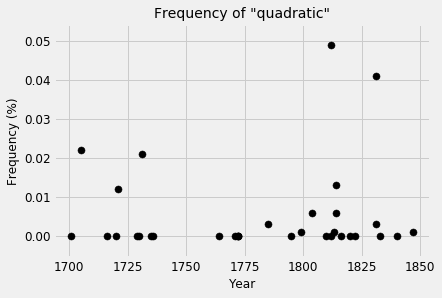

In [66]:
frequency_by_year('quadratic', fr_math)

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


,year,pages,freq
28,1701,690,0.013
16,1705,284,0.006
22,1716,496,0.009
4,1720,310,0.005
3,1721,512,0.002
15,1729,460,0.001
5,1730,688,0.058
27,1731,510,0.002
19,1735,430,0.001
2,1736,194,0.006


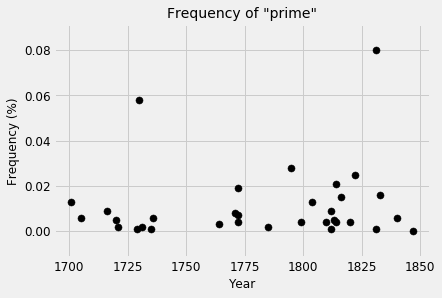

In [67]:
frequency_by_year('prime', fr_math)

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


,year,pages,freq
28,1701,690,0.014
16,1705,284,0.000
22,1716,496,0.013
4,1720,310,0.001
3,1721,512,0.013
15,1729,460,0.005
5,1730,688,0.015
27,1731,510,0.015
19,1735,430,0.000
2,1736,194,0.003


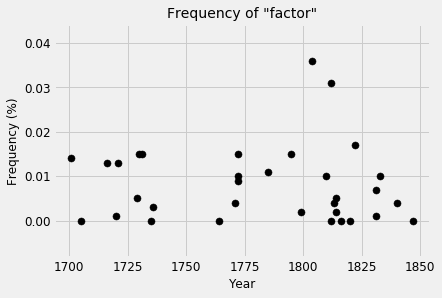

In [68]:
frequency_by_year('factor', fr_math)

# All done!
That's all for this notebook, but it doesn't mean you can't apply what you've learned. Can you think of any words you'd like to track over time? Feel free to use the following empty cells however you'd like. An interesting challenge would be to see if you can incorporate the frequency functions from Part 1 into the scatter function from Part 2. Have fun!